In [5]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
base_merge = pd.read_csv('xenofobia_volume.csv')
base_merge

,Date,Count
0,2020-04-01 00:00:00,9
1,2020-04-02 00:00:00,1
2,2020-04-03 00:00:00,13
3,2020-04-04 00:00:00,5
4,2020-04-05 00:00:00,4
...,...,...
361,2021-03-28 00:00:00,24
362,2021-03-29 00:00:00,35
363,2021-03-30 00:00:00,24
364,2021-03-31 00:00:00,26


In [7]:
base_merge.to_excel("Base_Diagramación_RD.xlsx")

In [8]:
base_merge.rename(columns={"Date": "Fecha", "Count": "Volumen"}, inplace = True)
base_merge['Fecha'] = pd.to_datetime(base_merge['Fecha'])
base_merge['Mes'] = base_merge['Fecha'].dt.strftime('%b %Y')
base_merge['Semana'] = base_merge['Fecha'].dt.dayofweek
base_merge["Fecha Semanal"] = base_merge["Semana"].astype(str) + base_merge["Mes"].astype(str)
base_merge

,Fecha,Volumen,Mes,Semana,Fecha Semanal
0,2020-04-01,9,Apr 2020,2,2Apr 2020
1,2020-04-02,1,Apr 2020,3,3Apr 2020
2,2020-04-03,13,Apr 2020,4,4Apr 2020
3,2020-04-04,5,Apr 2020,5,5Apr 2020
4,2020-04-05,4,Apr 2020,6,6Apr 2020
...,...,...,...,...,...
361,2021-03-28,24,Mar 2021,6,6Mar 2021
362,2021-03-29,35,Mar 2021,0,0Mar 2021
363,2021-03-30,24,Mar 2021,1,1Mar 2021
364,2021-03-31,26,Mar 2021,2,2Mar 2021


In [9]:
months = ["Apr 2020", "May 2020", "Jun 2020", 
          "Jul 2020", "Aug 2020", "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021" ]
diagramación = pd.DataFrame( base_merge[["Fecha", "Volumen", "Mes"]])
diagramación = pd.DataFrame(diagramación.groupby(diagramación['Mes'])['Volumen'].sum())
diagramación.reset_index(inplace=True)
diagramación['Mes'] = pd.Categorical(diagramación['Mes'], categories=months, ordered=True)
diagramación.sort_values(inplace=True, by="Mes")
diagramación.to_excel("Base_Diagramación_RD.xlsx")
diagramación.head()

,Mes,Volumen
0,Apr 2020,541
9,May 2020,902
7,Jun 2020,1552
6,Jul 2020,1029
2,Aug 2020,1552


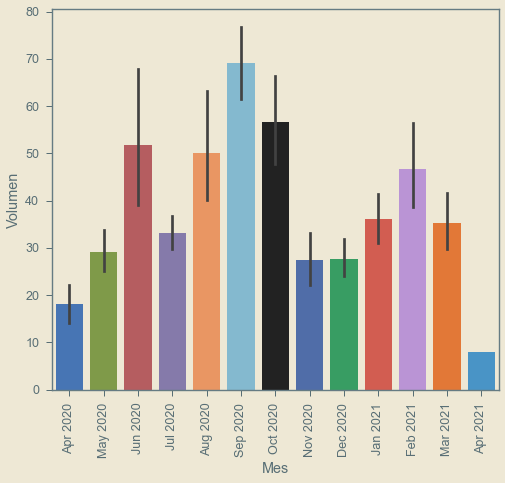

In [42]:
g = sns.barplot(x = 'Mes', y = 'Volumen', data = base_merge[['Mes', 'Volumen']])
for item in g.get_xticklabels():
    item.set_rotation(90)

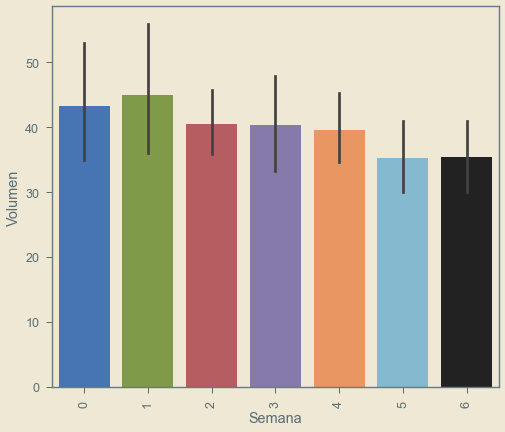

In [43]:
g = sns.barplot(x = 'Semana', y = 'Volumen', data = base_merge[['Semana', 'Volumen']])
for item in g.get_xticklabels():
    item.set_rotation(90)

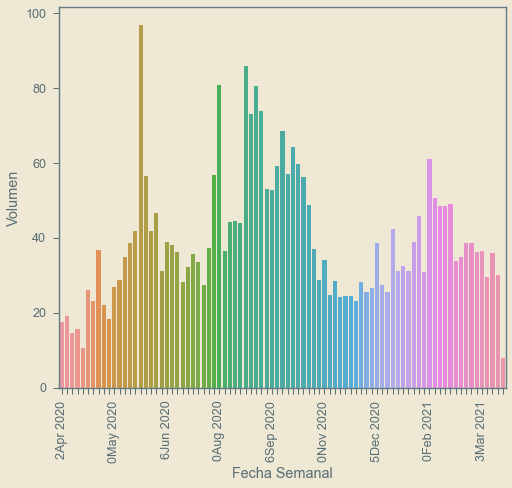

In [44]:
g = sns.barplot(x = 'Fecha Semanal', y = 'Volumen', data = base_merge[['Fecha Semanal', 'Volumen']], ci = None)
for item in g.get_xticklabels():
    item.set_rotation(90)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)